In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

news_df=pd.read_csv('/content/drive/MyDrive/CCP_Project/news_df_with_top4_signals.csv')
print(f"Length of raw dataframe = {len(news_df)}")
news_df.head(2)

Mounted at /content/drive
Length of raw dataframe = 3168


,id,news_date,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,signal_2,signal_3,signal_4
0,maretBeatPresfiling20231003,2023-10-03T15:45:10.000Z,K.J. Harrison & Partners Inc Boosts Stake in C...,Deutsche Bank AG has acquired an additional 49...,"Berenberg Bank, Sartorius","tensor([ 8.2298e-03, -1.0426e-01, -1.6461e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Partnerships_cos
1,busTIMESPresesginvestingubs,2023-10-03T15:35:31.000Z,Conference aims to connect investors as ESG tr...,The UBS APAC Sustainable Finance Conference 20...,"Answer:\r\n\r\nBerenberg, Sebastian Bray","tensor([ 1.5170e-02, 7.4811e-02, -7.3396e-02,...",Financial_Partnerships_cos,Financial_Deals_cos,Capital_Markets_Stock_Analysis_cos,Technological_Deals_Collaborations_cos


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Capital_Markets_Stock_Analysis_cos'),
  Text(1, 0, 'Financial_Partnerships_cos'),
  Text(2, 0, 'Financial_Deals_cos'),
  Text(3, 0, 'Financial_Innovations_cos'),
  Text(4, 0, 'Strategic_Steps_cos'),
  Text(5, 0, 'Legal_Affairs_cos'),
  Text(6, 0, 'Regulatory_Actions_cos'),
  Text(7, 0, 'Financial_Health_cos'),
  Text(8, 0, 'Technological_Product_Launches_Innovations_cos'),
  Text(9, 0, 'Personnel_Change_cos'),
  Text(10, 0, 'Financial_Products_Services_cos'),
  Text(11, 0, 'Technological_Deals_Collaborations_cos')])

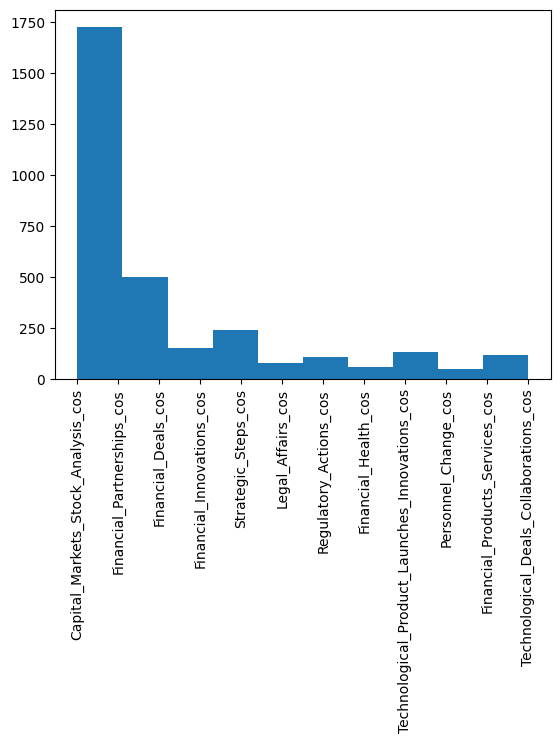

In [ ]:
plt.hist(news_df['signal_1'])
plt.xticks(rotation=90)

In [ ]:
company_of_interest = "Berenberg Bank" # company for which we want to analyze the news
signal_of_interest = "Capital_Markets_Stock_Analysis"


company_all_news_df = news_df[news_df['companies_in_news'].astype(str).str.contains(company_of_interest, case=False)]
company_all_news_df = company_all_news_df.sort_values(by='news_date', ascending = False)
# company_news_df = company_all_news_df[company_all_news_df['signal_1'] == signal_of_interest + '_cos'].drop(columns=['signal_2', 'signal_3', 'signal_4']) # filtering news with signal_of_interest as signal_1
company_news_df = company_all_news_df[
    (company_all_news_df['signal_1'] == signal_of_interest + '_cos') |
    (company_all_news_df['signal_2'] == signal_of_interest + '_cos') |
    (company_all_news_df['signal_3'] == signal_of_interest + '_cos') |
    (company_all_news_df['signal_4'] == signal_of_interest + '_cos')
]
# extracting dates from date-time-stamps
company_news_df['news_date_simplified'] = pd.to_datetime(company_news_df['news_date'].str[:10]) # extract first 10 characters and convert to datetime
company_news_df = company_news_df.reset_index(drop=True)
print(f"length of filtered dataframe = {len(company_news_df)}")

cols = ['id', 'news_date',	'news_date_simplified', 'news_title',	'news_content',	'companies_in_news',	'news_content_embeddings',	'signal_1',	'signal_2',	'signal_3',	'signal_4']
company_news_df = company_news_df[cols] #re-arranging columns
company_news_df.head(5)

length of filtered dataframe = 549


<ipython-input-5-dc93a37280c7>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_news_df['news_date_simplified'] = pd.to_datetime(company_news_df['news_date'].str[:10]) # extract first 10 characters and convert to datetime


,id,news_date,news_date_simplified,news_title,news_content,companies_in_news,news_content_embeddings,signal_1,signal_2,signal_3,signal_4
0,defWorldReporestupdate2html,2023-10-30 09:27:47,2023-10-30,Talanx AG (OTCMKTS:TNXXF) Short Interest Updat...,Berenberg Bank has upgraded its rating on Tala...,"Berenberg Bank, Talanx, HSBC.","tensor([-6.2445e-02, -5.9690e-02, -4.7869e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Products_Services_cos
1,defyHSBCStocweredbyhsbchtml,2023-10-28 16:40:01,2023-10-28,Reckitt Benckiser Group (OTCMKTS:RBGLY) Stock ...,Berenberg Bank has reduced its target price fo...,"Reckitt Benckiser Group, Berenberg Bank.","tensor([ 3.4826e-02, -4.2792e-03, -7.7424e-03,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Strategic_Steps_cos,Financial_Products_Services_cos
2,abcshadowPresmideast104342444,2023-10-26 19:28:46,2023-10-26,Europe's central bank is set to halt rate hike...,The European Central Bank's (ECB) message appe...,"Berenberg bank, European Central Bank.","tensor([ 2.8340e-02, 2.0919e-02, -3.0415e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Financial_Products_Services_cos,Regulatory_Actions_cos
3,fin1023Presoverweight915798,2023-10-21 16:04:27,2023-10-21,MTU Aero Engines Overweight von JP Morgan Chas...,JP Morgan Chase & Co. has announced its plan t...,"JP Morgan Chase & Co, Berenberg Bank, Joh. Ber...","tensor([-1.3338e-02, 6.3491e-02, -2.3519e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Financial_Innovations_cos,Strategic_Steps_cos
4,efiareersJobk252Cny252Cusa,2023-10-21 05:59:26,2023-10-21,Investment Banking Analyst job in New York at ...,"The article is not accessible, however, it men...","Berenberg Bank, eFinancialCareers","tensor([ 3.0946e-02, -8.2079e-02, -8.6097e-02,...",Capital_Markets_Stock_Analysis_cos,Financial_Deals_cos,Financial_Innovations_cos,Financial_Partnerships_cos


In [ ]:
# sample news item
import random
index = random.randint(0, len(company_news_df) - 1) #sample
print(f"index: {index}")
print(f"id: {company_news_df.id[index]}")
print(f"title: {company_news_df.news_title[index]}")
print(f"content: {company_news_df.news_content[index]}")
print(f"companies discussed: {company_news_df.companies_in_news[index]}")

index: 67
id: besestorsStocishoutlooksurro
title: Increased Short Interest and Bearish Outlook Surrounding Aviva Plc Raises Concerns for Investors
content: The article discusses how Berenberg Bank has lowered its price target on Aviva shares, expressing concerns about the future financial performance of the company. This development highlights doubts regarding Aviva's ability to achieve positive results in the coming period.
companies discussed: Berenberg Bank, Aviva.


In [ ]:
# topic modeling using embeddings based on https://github.com/ddangelov/Top2Vec
# (original paper - https://arxiv.org/abs/2008.09470)

%%capture
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]

In [ ]:
%%capture
from top2vec import Top2Vec

!python -m spacy download en_core_web_lg
import spacy

en = spacy.load("en_core_web_lg") #loading the english language large model of spacy

In [ ]:
news_content_list_en = company_news_df.news_content.tolist() # take news_content column in a list to feed to the model
news_content_list_en_processed = [] # empty list to collect news items from 'news_content_list_en' after removing stop words

sw_spacy = en.Defaults.stop_words # stop words present in the Spacy library

for text in news_content_list_en: # removing stop words from 'news_content_list_en' and collecting news items in 'news_content_list_en_processed'
  words = [word for word in text.split() if word.lower() not in sw_spacy]
  new_text = " ".join(words)
  news_content_list_en_processed.append(new_text)

print(len(news_content_list_en_processed))

549


In [ ]:
model = Top2Vec(documents = news_content_list_en_processed, speed = "deep-learn") # implementing Top2Vec model

number_of_topics = model.get_num_topics() # this returns the number of topics that Top2Vec has found in the data.
number_of_topics

INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model
INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


2

In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes() # This will return the number of documents most similar to each topic. Topics are in decreasing order of size.
topic_words, word_scores, topic_nums = model.get_topics(number_of_topics) # this returns the topics in decreasing size.

topic_df = pd.DataFrame(topic_sizes, topic_nums)
topic_df = topic_df.reset_index()
topic_df.columns = ["topic_nums", "topic_sizes"]
topic_df["topic_words"] = topic_words.tolist()
topic_df["word_scores"] = word_scores.tolist()
topic_df.head()

,topic_nums,topic_sizes,topic_words,word_scores
0,0,523,"[berenberg, bank, shares, gbx, stock, target, ...","[0.3243858814239502, 0.2956281900405884, 0.287..."
1,1,26,"[berenberg, bank, shares, gbx, stock, hold, ta...","[0.3609505891799927, 0.2705560326576233, 0.216..."


### Demo:

In [ ]:
#  let's search for topics most similar to any keyword

key_topic_words, key_word_scores, key_topic_scores, key_topic_nums = model.search_topics(keywords=["research"], num_topics = min(number_of_topics,5))
print(key_topic_nums)
print(key_topic_scores)

[0 1]
[0.02039891 0.01962205]


In [ ]:
news_content_list_en_processed[431]

'Berenberg Bank reaffirmed “buy” rating shares Barclays positioned GBX 260 ($3.14) price objective research note ...'

In [ ]:
news_content_list_en[431]

'Berenberg Bank reaffirmed their “buy” rating on shares of Barclays and positioned them with a GBX 260 ($3.14) price objective in a research note ...'

In [ ]:
# let's search documents that belong to the topic with max score.

documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=key_topic_nums[0], num_docs = min(10, topic_df.loc[topic_df["topic_nums"]==key_topic_nums[0], "topic_sizes"].iloc[0]))
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    # print(doc)
    print(news_content_list_en[doc_id])
    print("-----------")
    print()

Document: 431, Score: 0.8513680696487427
-----------
Berenberg Bank reaffirmed their “buy” rating on shares of Barclays and positioned them with a GBX 260 ($3.14) price objective in a research note ...
-----------

Document: 171, Score: 0.8459382057189941
-----------
Berenberg Bank reiterated a “buy” rating and set a GBX 260 ($3.25) target price on shares of Moneysupermarket.com Group in a research report on ...
-----------

Document: 227, Score: 0.8440432548522949
-----------
Finally Berenberg Bank reaffirmed a “hold” rating and issued a GBX 760 ($9.44) price objective on shares of Vistry Group in a research report on ...
-----------

Document: 437, Score: 0.8435876369476318
-----------
Berenberg Bank restated a “buy” rating and issued a GBX 1130 ($13.64) price objective on shares of Dunelm Group in a research note on Tuesday ...
-----------

Document: 228, Score: 0.8428008556365967
-----------
Separately Berenberg Bank reissued a “buy” rating and issued a GBX 140 ($1.74) target price

In [ ]:
# let's search documents for content semantically similar to MULTIPLE KEYWORDS.

documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["research", "price"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(news_content_list_en[doc_id])
    print("-----------")
    print()

Document: 384, Score: 0.22404847784590237
-----------
Other research analysts also recently issued reports about the company. Berenberg Bank set a €215.00 ($228.72) target price on Hypoport in a research ...
-----------

Document: 383, Score: 0.19811490235533713
-----------
Berenberg Bank set a €28.00 ($29.79) target price on Aixtron in a research note on Wednesday December 7th. Finally Warburg Research set a €30.00 ($ ...
-----------

Document: 373, Score: 0.187866891602171
-----------
In a research note that was published on Monday October 24th Berenberg Bank raised their “buy” rating and raised their price objective on ...
-----------

Document: 450, Score: 0.18500384120214125
-----------
In a research report made available to the public on November 8th Berenberg Bank predicted that the share price of BioNTech would reach $312.00.
-----------

Document: 280, Score: 0.18195010378930726
-----------
In a research note that was published on January 30th Berenberg Bank upgraded Aviva to 

In [ ]:
from top2vec import Top2Vec

# Initialize a dataframe to store feedback
feedback_df = pd.DataFrame(columns=['document_id', 'topic_num', 'user_feedback'])

# Function to collect user feedback
def collect_feedback(document_id, topic_num, ranking):
    global feedback_df
    feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)

# Example loop for collecting feedback for the top 5 news
for i in range(min(5, len(documents))):
    document_id = i  # Assuming 'documents' is a list of documents
    topic_num = key_topic_nums[0]  # You can customize this based on your implementation
    ranking = int(input(f"Rank the relevance of Document {document_id} to Topic {topic_num} (1 to 5): "))

    # Collect feedback
    collect_feedback(document_id, topic_num, ranking)

# Display the collected feedback
print("User Feedback:")
print(feedback_df)

# Assuming you have labeled feedback for the documents, where 1 indicates relevant and 0 indicates not relevant
# You need to replace this with your actual feedback data
feedback_labels = np.array(feedback_df['user_feedback'])

# Initialize a list to store relevant documents
relevant_docs = []

# Set the initial ranking threshold for relevant documents
ranking_threshold = 3  # You can customize this based on your requirements

# Iterate over documents and collect relevant ones based on feedback
for i, (doc_id, score, label) in enumerate(zip(document_ids, document_scores, feedback_labels)):
    if i < 5 and label >= ranking_threshold:
        relevant_docs.append(news_content_list_en[i])

# Combine existing data with relevant documents
combined_data = news_content_list_en + relevant_docs

# Retrain the model with the combined data
new_model_1 = Top2Vec(documents=combined_data, speed="deep-learn")

# Now 'new_model' can be used for further inference


Rank the relevance of Document 0 to Topic 0 (1 to 5): 1


<ipython-input-47-fac3272eb32a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)


Rank the relevance of Document 1 to Topic 0 (1 to 5): 2


<ipython-input-47-fac3272eb32a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)


Rank the relevance of Document 2 to Topic 0 (1 to 5): 3


<ipython-input-47-fac3272eb32a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)


Rank the relevance of Document 3 to Topic 0 (1 to 5): 4


<ipython-input-47-fac3272eb32a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)


Rank the relevance of Document 4 to Topic 0 (1 to 5): 5


<ipython-input-47-fac3272eb32a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feedback_df = feedback_df.append({'document_id': document_id, 'topic_num': topic_num, 'user_feedback': ranking}, ignore_index=True)
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
INFO:top2vec:Downloading universal-sentence-encoder-multilingual model


User Feedback:
  document_id topic_num user_feedback
0           0         0             1
1           1         0             2
2           2         0             3
3           3         0             4
4           4         0             5


INFO:top2vec:Creating joint document/word embedding
INFO:top2vec:Creating lower dimension embedding of documents
INFO:top2vec:Finding dense areas of documents
INFO:top2vec:Finding topics


In [57]:
# Assuming 'new_model_1' is the updated model
new_topic_sizes, new_topic_nums = new_model_1.get_topic_sizes()
new_topic_words, new_word_scores, new_topic_nums = new_model_1.get_topics(number_of_topics)

# Assuming 'key_topic_nums' is defined based on the new topics
key_topic_nums = [new_topic_nums[0]]  # You need to customize this based on your implementation

# Search for topics related to "research"
new_key_topic_words, new_key_word_scores, new_key_topic_scores, new_key_topic_nums = new_model_1.search_topics(keywords=["research"], num_topics=min(len(new_topic_nums), 5))

documents, document_scores, document_ids = new_model_1.search_documents_by_topic(
    topic_num=new_key_topic_nums[0],
    num_docs=min(10, new_topic_sizes[new_key_topic_nums[0]])
)

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    # print(doc)
    print(news_content_list_en[doc_id])
    print("-----------")
    print()


Document: 437, Score: 0.8461662530899048
-----------
Berenberg Bank restated a “buy” rating and issued a GBX 1130 ($13.64) price objective on shares of Dunelm Group in a research note on Tuesday ...
-----------

Document: 228, Score: 0.8396763801574707
-----------
Separately Berenberg Bank reissued a “buy” rating and issued a GBX 140 ($1.74) target price on shares of LBG Media in a report on Wednesday ...
-----------

Document: 171, Score: 0.8396044969558716
-----------
Berenberg Bank reiterated a “buy” rating and set a GBX 260 ($3.25) target price on shares of Moneysupermarket.com Group in a research report on ...
-----------

Document: 431, Score: 0.8391677141189575
-----------
Berenberg Bank reaffirmed their “buy” rating on shares of Barclays and positioned them with a GBX 260 ($3.14) price objective in a research note ...
-----------

Document: 226, Score: 0.8365423083305359
-----------
Berenberg Bank reiterated a “buy” rating and set a GBX 4500 ($55.89) target price on shares of T